In [1]:
import matplotlib.pyplot as plt
from monte_carlo.extreme_learning import *

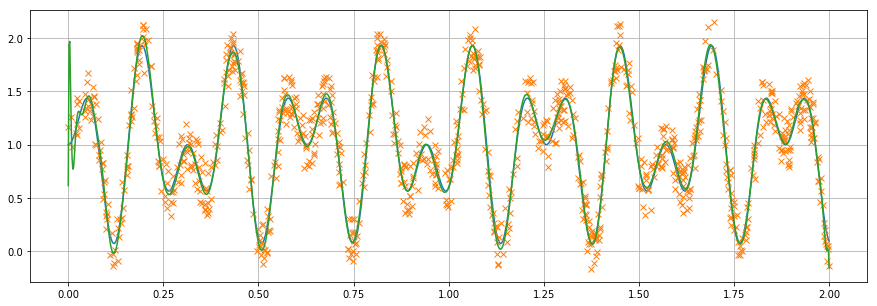

In [3]:
basis = TrigBasis(1, (0, 100), (-1, 0))

N = 1000
node_count = 80
fn = lambda xs: np.sin(40 * xs)*np.sin(10*xs) + 1
xs = np.random.rand(N).reshape(N, 1)*2
values = fn(xs) + (np.random.rand(N).reshape(N, 1) - .5) / 2
params, weights = basis.extreme_learning_train(xs, values, node_count)


plt.figure(figsize=(15, 5))

x = np.linspace(0, 1, 1000) * 2
plt.plot(x, fn(x))
plt.plot(xs, values, 'x')
plt.plot(x, basis.eval_all(params, weights, x.reshape(1000,1)))
# plt.plot(-params[0], [-1.5]*node_count, '+')
plt.grid()

plt.show()

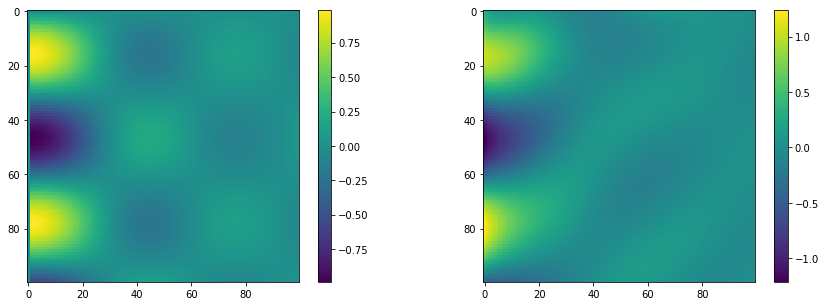

In [7]:
basis = TrigBasis(2, (0, 10), (-1, 0))

N = 10000
node_count = 100
fn = lambda xs, ys: np.sin(10 * xs)/(10 *xs+.001) * np.sin(10 * ys)
xs = np.random.rand(N * 2).reshape(N, 2)*2
values = fn(*xs.transpose())

params, weights = basis.extreme_learning_train(xs, values, node_count)


plt.figure(figsize=(15, 5))

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100) 
mgrid = np.meshgrid(x, y)

plt.subplot(121)
values = np.random.random((100, 100))
plt.imshow(fn(*mgrid))
plt.colorbar()
plt.subplot(122)
plt.imshow(basis.eval_all(params, weights, *mgrid))
plt.colorbar()

plt.show()

In [8]:
basis.eval(params, weights, [0, 0])

0.3816209532172934